# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

## **Exploración y preprocesamiento de datos**

In [64]:
#from imblearn.over_sampling import ADASYN
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pickle

In [65]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore')

In [66]:
import yaml
with open(r'../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

In [67]:
df = pd.read_csv(config['data_load']['dataset_csv'])
df.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [68]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [69]:
#print(data.describe())

In [70]:
descripcion = pd.DataFrame(df.describe())
descripcion

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


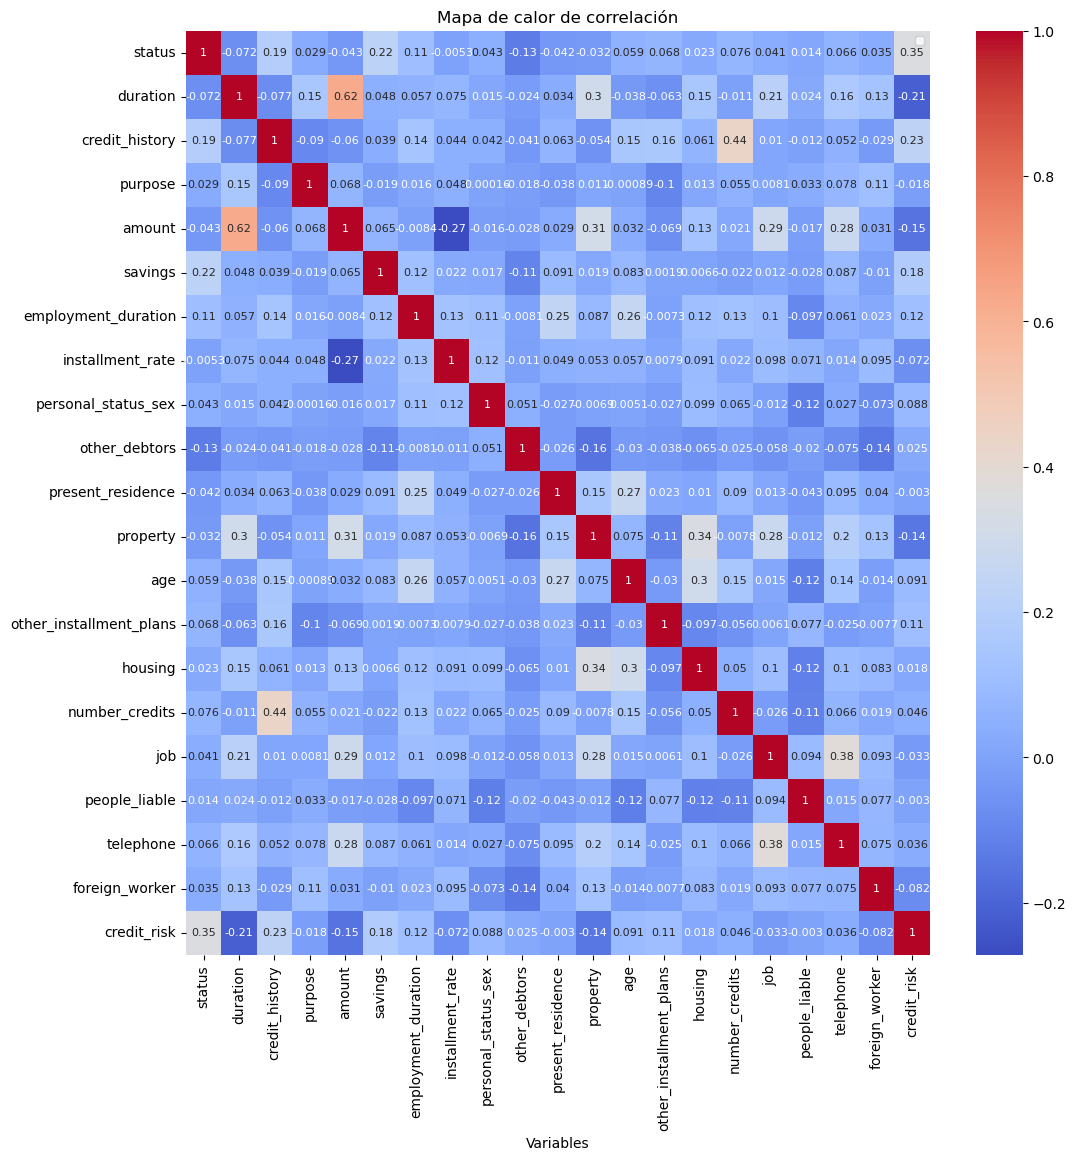

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title("Mapa de calor de correlación")
plt.xlabel("Variables",fontsize=10)
plt.legend(fontsize = 8)
plt.show()

In [72]:
var_num=["duration", "amount", "age"]

In [73]:
columns_sel=['duration','purpose','amount','other_debtors','age','other_installment_plans','housing','number_credits','job',
        'people_liable','foreign_worker']


In [74]:
colmns_sel_outlider =  ['duration', 'amount', 'age', 'number_credits']

In [75]:
len(colmns_sel_outlider)

4

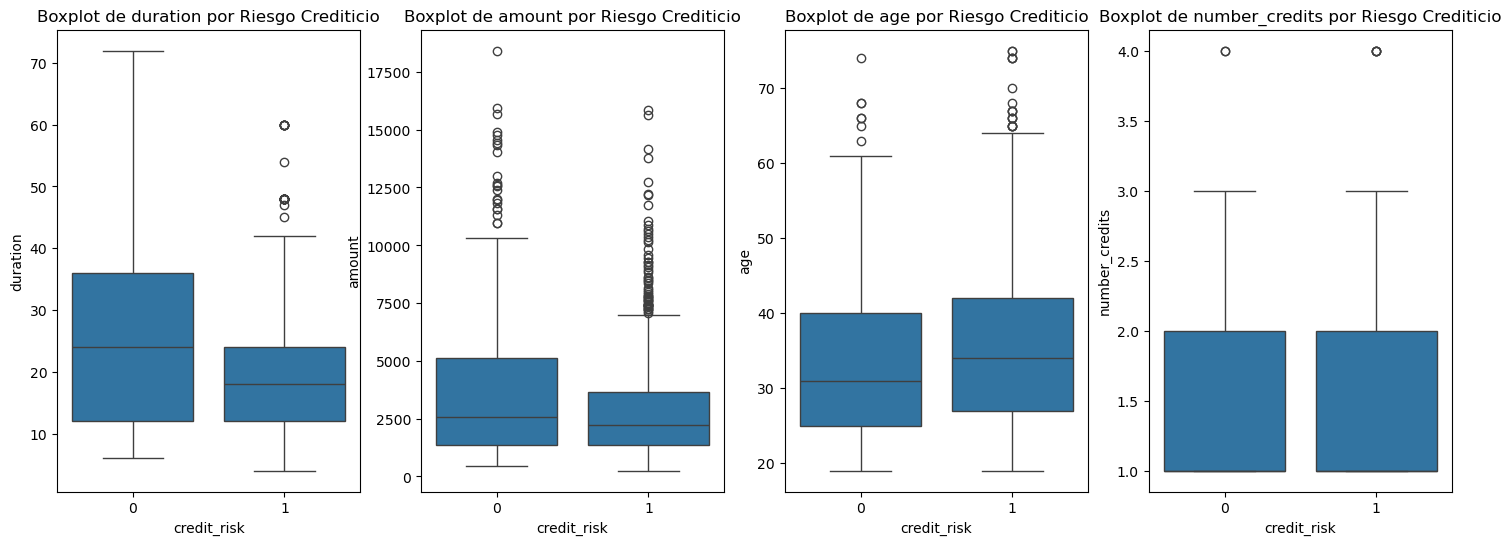

In [76]:
fig, axs = plt.subplots(1, len(colmns_sel_outlider), figsize=(18, 6))
for i, col in enumerate(colmns_sel_outlider):
    sns.boxplot(x=df['credit_risk'], y=df[col], ax=axs[i])
    axs[i].set_title(f"Boxplot de {col} por Riesgo Crediticio")
plt.show()

In [77]:

#def Atipicos(df, columns_sel):
tb_Atipicos = pd.DataFrame(columns = ['Columna', 'IQR', 'Atipicos', 'EliminadosP100'])
#tb_Atipicos = ['Columna', 'IQR', 'Atipicos', 'EliminadosP100']
Registros_df = df.shape[0]

for col in columns_sel: 
    #print(col) 
    Q1 = (df[col].dropna().quantile(0.25))
    Q3 = (df[col].dropna().quantile(0.75))
    IQR = Q3 - Q1
    vAtipicos = ( (( df[col].dropna() < (Q1 - 1.5 * IQR)) | ( df[col].dropna() > (Q3 + 1.5 * IQR))).sum() )
    BM_Outliers = (( df[col] < (Q1 - 1.5 * IQR)) | ( df[col] > (Q3 + 1.5 * IQR)))
    eEliminados = vAtipicos/Registros_df*100

    df.drop(df[BM_Outliers].index, inplace = True)

    new_RowAti={'Columna':col,'IQR':IQR, 'Atipicos':vAtipicos, 'EliminadosP100': eEliminados}
    #print(new_RowAti)
    #tb_Atipicos = tb_Atipicos.concat([df, pd.DataFrame([new_RowAti])], ignore_index=True)  
    #tb_Atipicos = tb_Atipicos.append(new_RowAti, ignore_index=True)
    #tb_Atipicos = pd.concat([tb_Atipicos, pd.DataFrame([new_RowAti])], ignore_index=True)
    tb_Atipicos.loc[len(df)]=new_RowAti
tb_Atipicos
    

,Columna,IQR,Atipicos,EliminadosP100
930,duration,12.0,70,7.0
833,purpose,2.0,97,9.7
773,amount,2243.0,60,6.0
696,other_debtors,0.0,77,7.7
679,age,15.0,17,1.7
572,other_installment_plans,0.0,107,10.7
411,housing,0.0,161,16.1
409,number_credits,1.0,2,0.2
277,job,0.0,132,13.2
255,people_liable,0.0,22,2.2


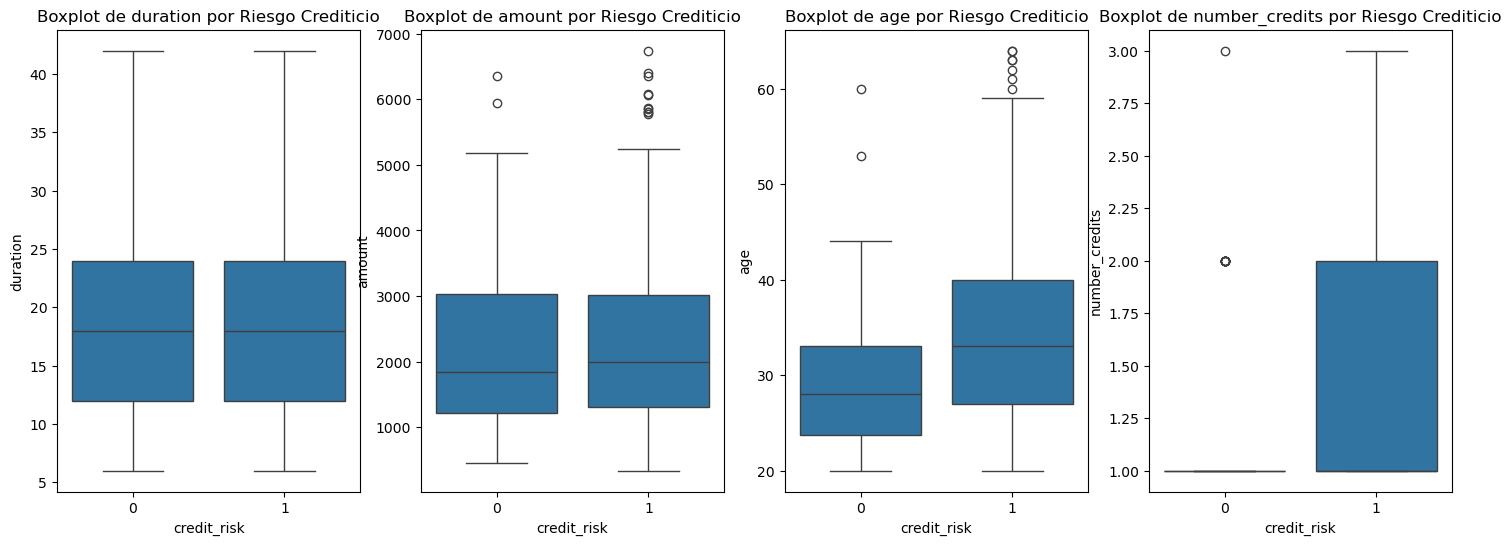

In [78]:
fig, axs = plt.subplots(1, len(colmns_sel_outlider), figsize=(18, 6))
for i, col in enumerate(colmns_sel_outlider):
    sns.boxplot(x=df['credit_risk'], y=df[col], ax=axs[i])
    axs[i].set_title(f"Boxplot de {col} por Riesgo Crediticio")
plt.show()

In [79]:
df.skew()

status                    -0.457432
duration                   0.652140
credit_history             0.084758
purpose                    0.228909
amount                     1.125331
savings                    0.804239
employment_duration        0.088698
installment_rate          -0.885044
personal_status_sex       -0.222140
other_debtors              0.000000
present_residence         -0.003948
property                  -0.178267
age                        1.085695
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.977719
job                        0.000000
people_liable              0.000000
telephone                  0.711400
foreign_worker             0.000000
credit_risk               -1.441325
dtype: float64

In [80]:
col=['amount','savings','number_credits']
for i in col:
    df[i]=np.log(df[i]+1)

In [81]:
df.skew()

status                    -0.457432
duration                   0.652140
credit_history             0.084758
purpose                    0.228909
amount                    -0.180211
savings                    0.617187
employment_duration        0.088698
installment_rate          -0.885044
personal_status_sex       -0.222140
other_debtors              0.000000
present_residence         -0.003948
property                  -0.178267
age                        1.085695
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.830676
job                        0.000000
people_liable              0.000000
telephone                  0.711400
foreign_worker             0.000000
credit_risk               -1.441325
dtype: float64

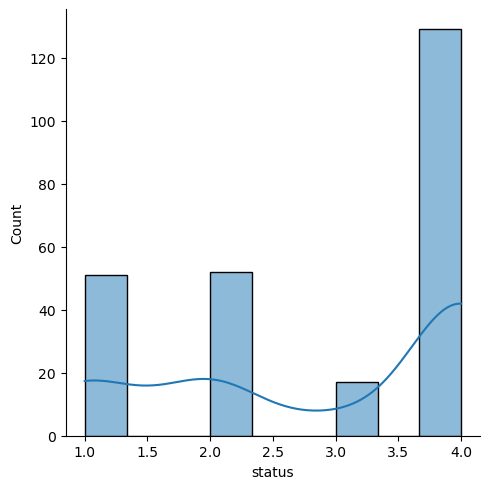

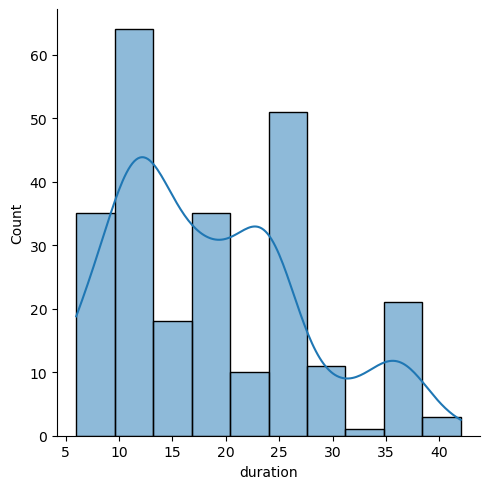

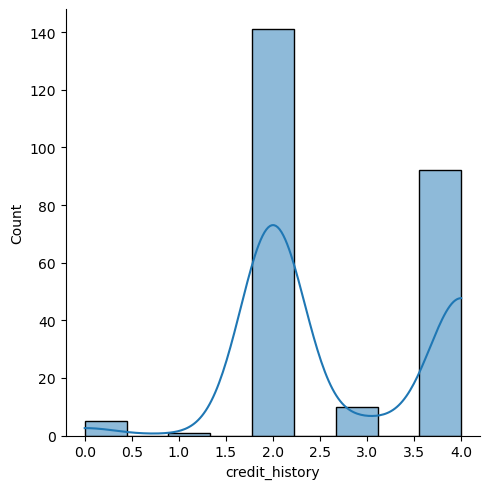

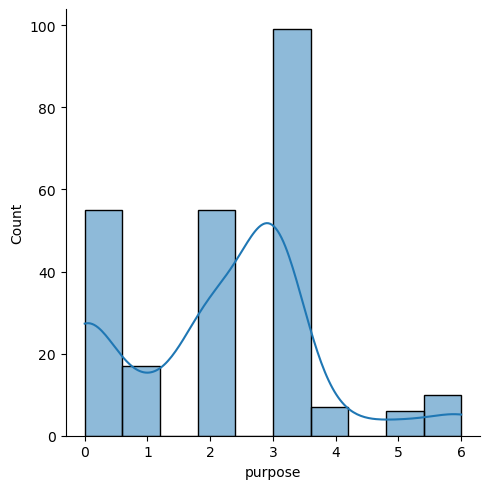

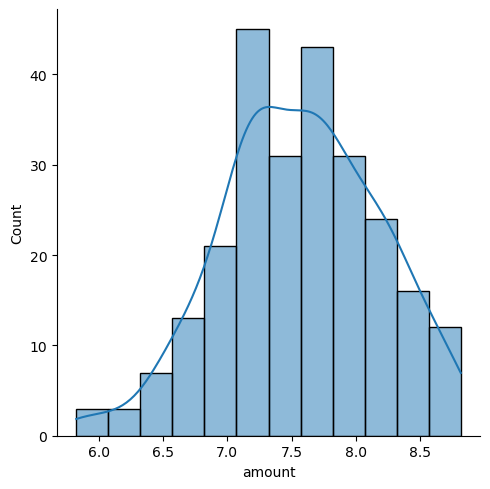

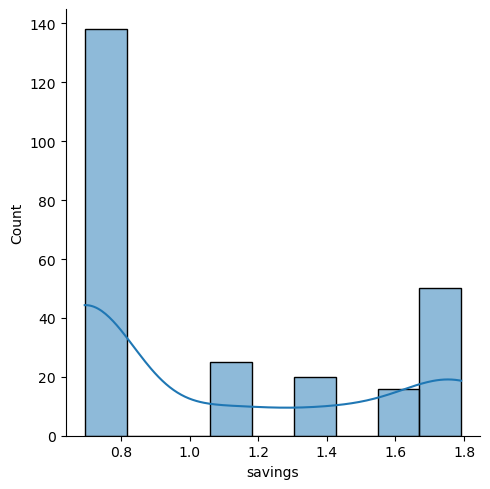

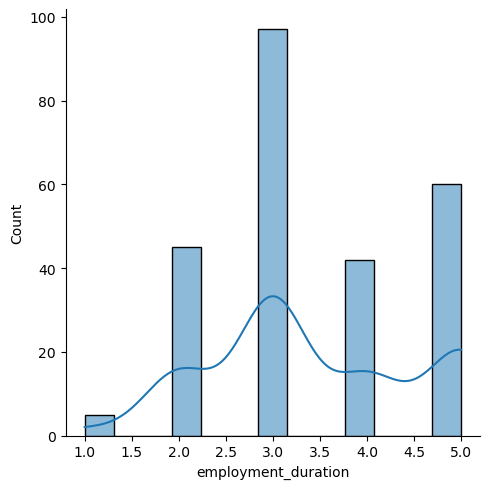

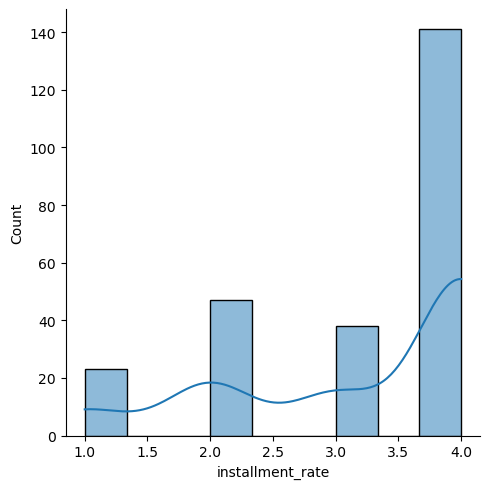

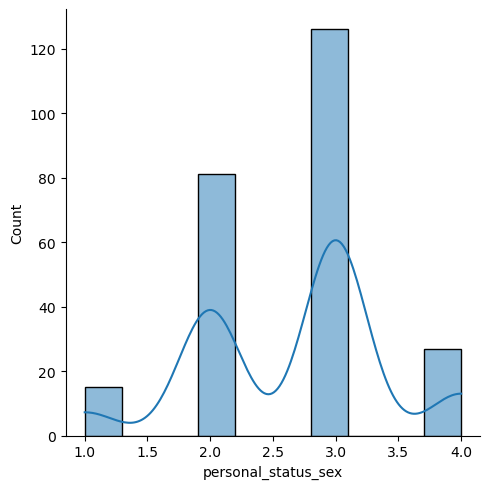

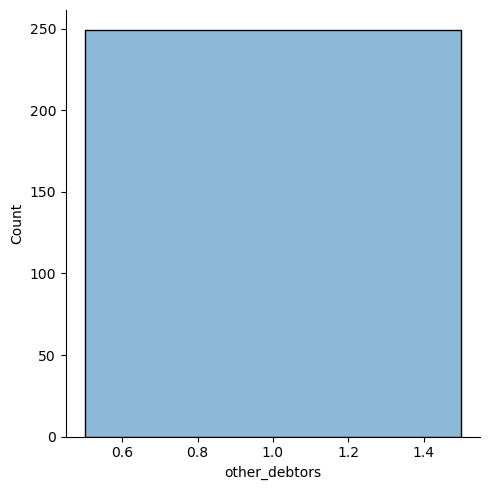

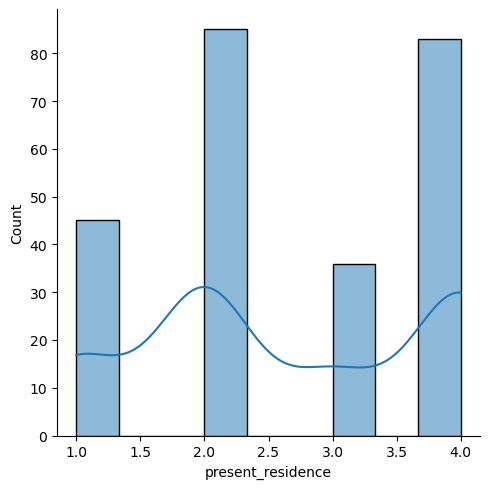

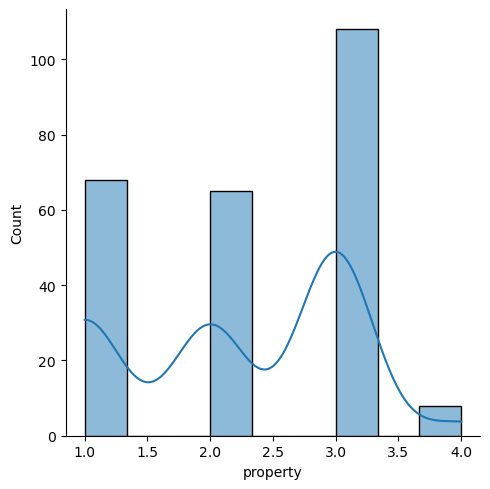

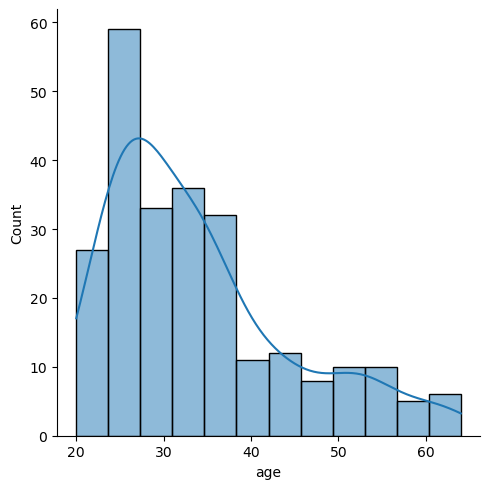

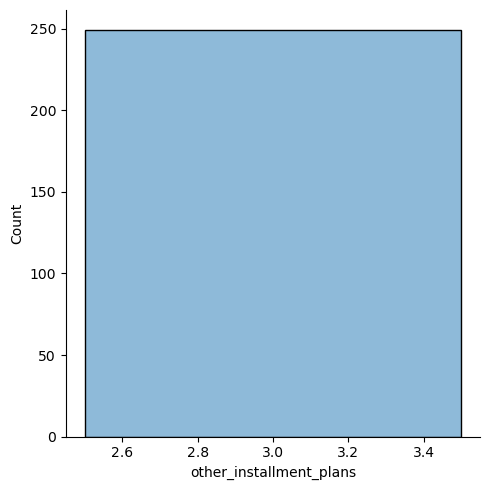

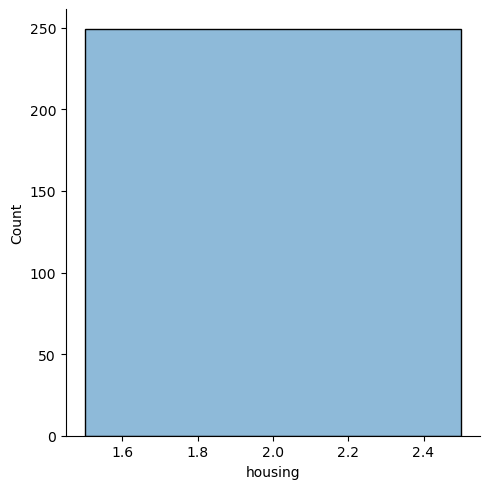

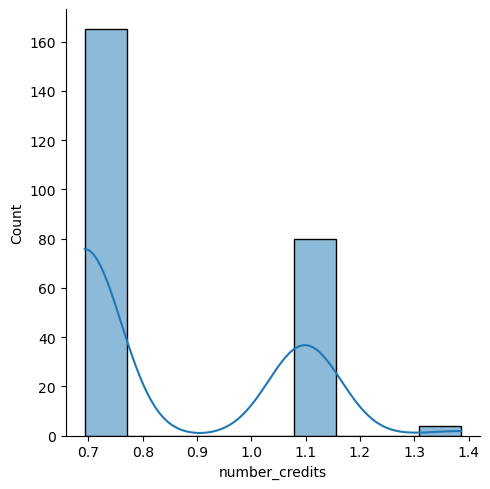

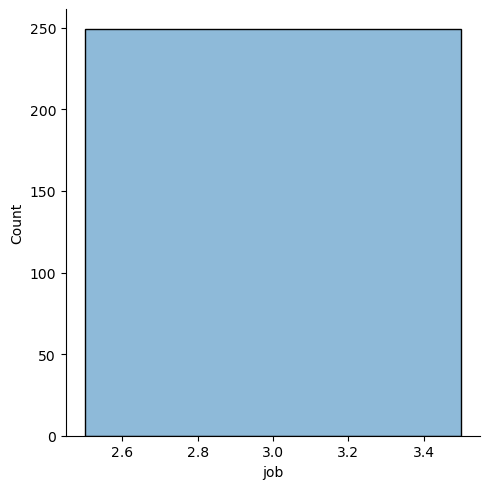

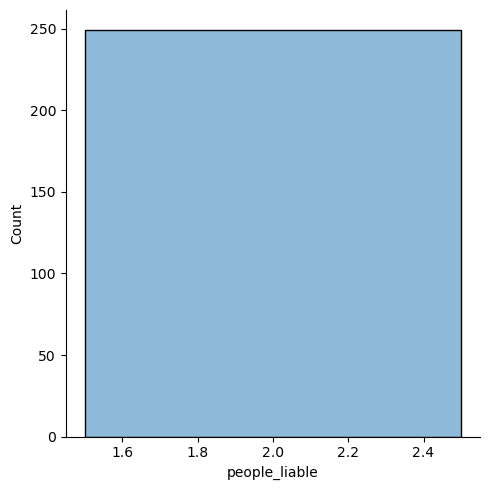

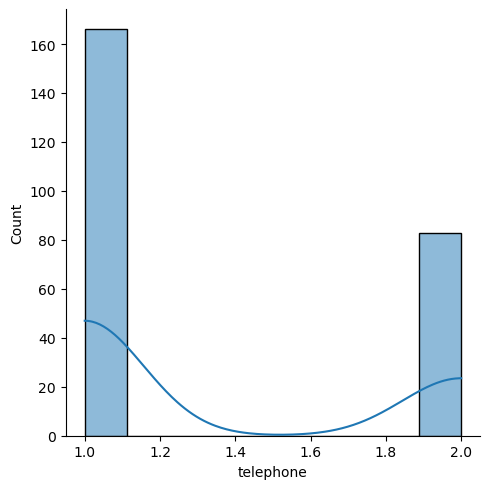

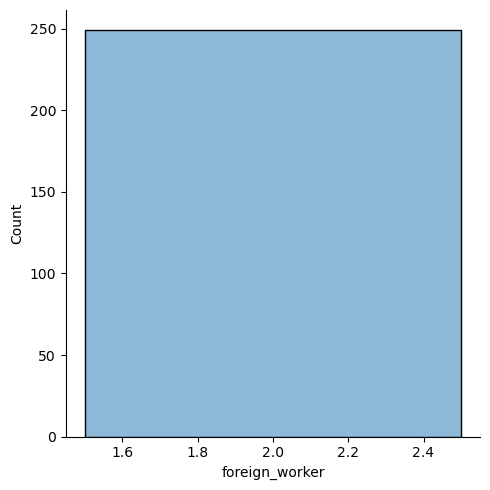

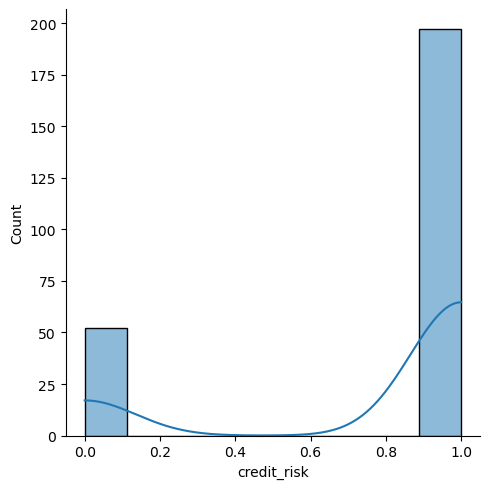

In [82]:
for i in df.columns:
    sns.displot(data=df,x=i,kde=True)

In [83]:
del df['other_debtors']
del df['other_installment_plans']
del df['housing']
del df['job']
del df['people_liable']
del df['foreign_worker']

In [84]:
scaling = [feature for feature in df.columns if feature not in ['credit_risk']]

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[scaling])

StandardScaler()

In [86]:
scaler.transform(df[scaling])

array([[-1.53267985, -1.43318683,  1.22741972, ..., -0.27792805,
        -0.70227598, -0.70710678],
       [-0.7258357 ,  2.02144551,  1.22741972, ...,  0.20066175,
        -0.70227598, -0.70710678],
       [-0.7258357 , -0.74226036,  1.22741972, ..., -0.75651784,
        -0.70227598, -0.70710678],
       ...,
       [-0.7258357 ,  0.63959257, -0.71307241, ..., -1.13938968,
        -0.70227598,  1.41421356],
       [-1.53267985, -0.74226036, -0.71307241, ..., -1.3308256 ,
        -0.70227598, -0.70710678],
       [-1.53267985,  1.33051904, -0.71307241, ..., -0.27792805,
        -0.70227598, -0.70710678]])

In [87]:
df2=pd.DataFrame(scaler.transform(df[scaling]),columns=df[scaling].columns)

In [88]:
final=pd.concat([df[['credit_risk']].reset_index(drop=True),df2],axis=1)
final.head()

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
0,1,-1.532680,-1.433187,1.227420,0.54404,0.022392,-0.819956,0.518670,-2.102864,-0.884798,1.219507,0.874962,-0.277928,-0.702276,-0.707107
1,1,-0.725836,2.021446,1.227420,0.54404,0.312820,-0.819956,1.428168,0.774131,0.450443,1.219507,-1.382712,0.200662,-0.702276,-0.707107
2,1,-0.725836,-0.742260,1.227420,1.20485,-0.497893,-0.819956,0.518670,0.774131,0.450443,0.329017,-0.253875,-0.756518,-0.702276,-0.707107
3,1,-0.725836,-0.857415,0.257174,0.54404,1.481051,-0.819956,0.518670,-1.143865,0.450443,1.219507,-0.253875,1.636431,-0.702276,-0.707107
4,1,0.887853,-0.396797,-0.713072,-1.43839,0.999906,1.576673,-0.390829,-0.184867,0.450443,-0.561474,2.003799,-0.469364,-0.702276,-0.707107


In [89]:
#final.to_csv(r'./data/Final_Model.csv',index=False)

In [90]:
#print(config['data_load']['dataToModel'])

In [91]:
final.to_csv(config['data_load']['dataToModel'],index=False)

In [92]:
file = 'Scaler_Credit_Data.pkl'

pickle.dump(scaler,open(file,'wb'))